In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import arviz as az
from statsmodels.tsa import stattools
import statsmodels.api as sm
import pymc3 as pm
import pymc

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

### Simulating from a mixture model

In [4]:
from scipy.stats import norm

# Generate n observations from a mixture of two Gaussian distributions

n     = 50           # Size of the sample to be generated
w     = [0.6, 0.4]  # Weights
mu    = [0, 5]      # Means
sigma = [1, 2]     # Standard deviations
### Step 1 ###
cc    = np.random.choice([0, 1], n, p= w) # C_i sample 
x     = []
### Step 2 ###
for i in range(n):
  x.append(norm.rvs(loc = mu[cc[i]], scale = sigma[cc[i]], size = 1))

print('The first five samples of C_i are: {}'.format(cc[:5]))
print('The first five samples of the mixture are: {}'.format(x[:5]))

The first five samples of C_i are: [0 1 0 0 1]
The first five samples of the mixture are: [array([0.16482109]), array([6.24198948]), array([0.24579074]), array([1.37871779]), array([7.46074407])]


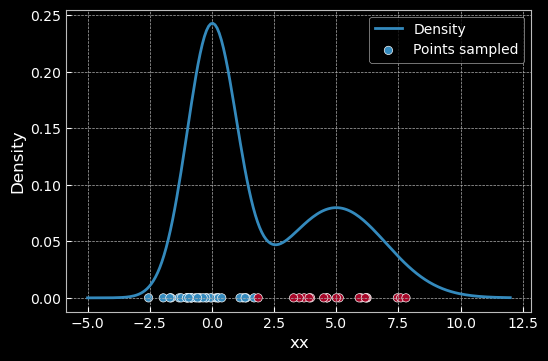

In [5]:
# Plot f(x) along with the observations just sampled

# Values to sample
xx = np.linspace(-5, 12.0, num = 200)

yy = w[0] * norm.pdf(loc = mu[0], scale = sigma[0], x = xx) + w[1] * norm.pdf(loc = mu[1], scale = sigma[1], x = xx)

# Plotting the mixture models
fig, ax = plt.subplots(1, 1)
sns.lineplot(xx, yy)
sns.scatterplot(np.array(x).ravel(), np.zeros(len(x)), hue = cc)
plt.xlabel('xx')
plt.ylabel('Density')
plt.legend(['Density', 'Points sampled'])
plt.show()